**⭐️ IMAGE CLASSIFICATION**

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from torchvision import transforms

class SimpleImageDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.transform = transform
        self.image_paths = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path)]
        self.labels = [0 if 'orange' in fname else 1 for fname in os.listdir(folder_path)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx])
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, label

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size//2)
        self.fc3 = nn.Linear(hidden_size//2, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return self.softmax(x)

transform = transforms.Compose([
    transforms.Resize((64, 64)), 
    transforms.ToTensor(),        
    transforms.Lambda(lambda x: x.view(-1)) 
])

dataset = SimpleImageDataset('/kaggle/input/mangorange/img_classification', transform=transform)
train_loader = DataLoader(dataset, batch_size=2, shuffle=True)
input_size = 64 * 64
hidden_size = 128
output_size = 2
model = SimpleNN(input_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

num_epochs = 10000
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    if epoch%100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10000], Loss: 0.6892
Epoch [101/10000], Loss: 0.5524
Epoch [201/10000], Loss: 0.4568
Epoch [301/10000], Loss: 0.3974
Epoch [401/10000], Loss: 0.3658
Epoch [501/10000], Loss: 0.3487
Epoch [601/10000], Loss: 0.3389
Epoch [701/10000], Loss: 0.3328
Epoch [801/10000], Loss: 0.3287
Epoch [901/10000], Loss: 0.3259
Epoch [1001/10000], Loss: 0.3238
Epoch [1101/10000], Loss: 0.3223
Epoch [1201/10000], Loss: 0.3211
Epoch [1301/10000], Loss: 0.3201
Epoch [1401/10000], Loss: 0.3194
Epoch [1501/10000], Loss: 0.3187
Epoch [1601/10000], Loss: 0.3182
Epoch [1701/10000], Loss: 0.3178
Epoch [1801/10000], Loss: 0.3174
Epoch [1901/10000], Loss: 0.3171
Epoch [2001/10000], Loss: 0.3168
Epoch [2101/10000], Loss: 0.3165
Epoch [2201/10000], Loss: 0.3163
Epoch [2301/10000], Loss: 0.3161
Epoch [2401/10000], Loss: 0.3159
Epoch [2501/10000], Loss: 0.3158
Epoch [2601/10000], Loss: 0.3156
Epoch [2701/10000], Loss: 0.3155
Epoch [2801/10000], Loss: 0.3154
Epoch [2901/10000], Loss: 0.3153
Epoch [3001/10000], Lo

**⭐️ INFER**

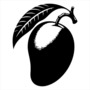

In [15]:
model.eval()

from PIL import Image
image_path = '/kaggle/input/mangorange/img_classification/mango.jpg'
image = Image.open(image_path)
image

In [16]:
image = transform(image).unsqueeze(0)

with torch.no_grad():
    output = model(image)

_, predicted_class = torch.max(output, 1)


dictt = {
    0: "ORANGE",
    1: "MANGO"
}
print(f'Predicted class: {dictt[predicted_class.item()]}')

Predicted class: MANGO
